# A Look at the Data
In order to get a better understanding of the data we will be looking at throughout, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('COVID.csv')
df.head()

,id,case_in_country,reporting_date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,...,recovered,symptom,source,link,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


* Provide the number of rows and columns in this dataset.

In [39]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

print(num_rows,'rows in the dataset','|',num_cols, 'columns in the dataset') 

1085 rows in the dataset | 26 columns in the dataset


* Which columns had no missing values? Provide a set of column names that have no missing values

In [40]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.

print(no_nulls)

{'country', 'source', 'recovered', 'visiting_Wuhan', 'death', 'location', 'link'}


* Which columns have the most missing values? Provide a set of column name that have more than 75% if their values missing.

In [41]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])#Provide a set of columns with more than 75% of the values missing

print(most_missing_cols)

{'Unnamed: 25', 'Unnamed: 21', 'exposure_start', 'Unnamed: 20', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 22', 'reporting_date', 'symptom'}


 * Provide a pandas series of the different county values in the dataset. Store this pandas series in origin_vals. If you are correct, you should see a bar chart of the proportion of origin of individuals.

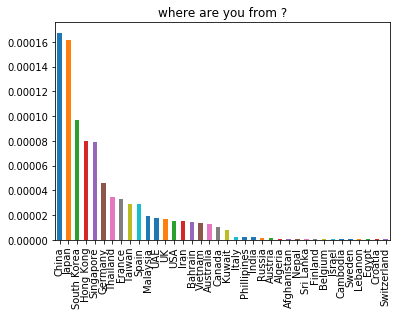

In [43]:
origin_vals = df.country.value_counts()#Provide a pandas series of the counts for each Country

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("where are you from ?");

* Provide a pandas series of the different gender values in the dataset. Store this pandas series in gender_vals.

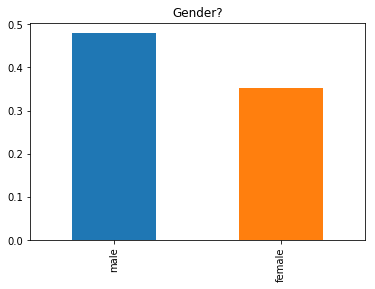

In [47]:
gender_vals = df.gender.value_counts()#Provide a pandas series of the counts for each Gender

(gender_vals/df.shape[0]).plot(kind="bar");
plt.title("Gender?");

In [154]:
pd.DataFrame(df.query("country == 'Canada' and (gender == 'male' or gender == 'female')").groupby(['gender', 'summary']).mean()['visiting_Wuhan'])

visiting_Wuhan
gender summary                                                           
female new confirmed COVID-19 patient in Toronto, Cana...               1
       new confirmed COVID-19 patient in Toronto, Cana...               0
       new confirmed COVID-19 patient in Toronto, Cana...               1
       new confirmed COVID-19 patient in Toronto, Cana...               1
       new confirmed COVID-19 patient in Vancouver, Ca...               0
       new confirmed COVID-19 patient in Vancouver, Ca...               0
       new confirmed COVID-19 patient in Vancouver, Ca...               0
       new confirmed COVID-19 patient in Vancouver, Ca...               0
male   new confirmed COVID-19 patient in Toronto, Cana...               1
       new confirmed COVID-19 patient in Vancouver, Ca...               0
       new confirmed COVID-19 patient in Vancouver, Ca...               0
       new confirmed COVID-19 patient in Vancouver, Ca...               1

* Write a function called get_description that takes the df dataframe and the column as a string, and returns a string of the description for that column.

In [77]:
def get_description(column_name, df=df):
    '''
    INPUT - schema - pandas dataframe with the df 
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(df[df['source'] == column_name]['summary'])[0]
    return desc

get_description(df.source[1]) # This should return a string of the first summary column description

'First confirmed imported COVID-19 pneumonia patient in Shenzhen (from Wuhan): male, 66, shenzheng residence, visited relatives in Wuhan on 12/29/2019, symptoms onset on 01/03/2020, returned to Shenzhen and seek medical care on 01/04/2020, hospitalized on 01/11/2020, sample sent to China CDC for testing on 01/18/2020, confirmed on 01/19/2020. 8 others under medical observation, contact tracing ongoing.'

In [78]:
descrips = set(get_description(col) for col in df.source)
print(descrips)

{'new confirmed COVID-19 patient in Japan: male, 30s, returned to Wuhan on third flight 1/31/2020, no symptoms', 'First confirmed imported cases in Zhejiang: patient is male, 46, lives in Wuhan, self-driving from Wuhan to Hangzhou on 01/03/2020, symptom onset 01/04/2020, hospitalized on 01/17/2020, sample deliver to China CDC for testing on 01/20/2020, test positive on 01/21/2020.', 'new confirmed imported COVID-19 pneumonia patient in Beijing: male, 37, visited Wuhan on 01/10/2020, return to Beijing on 01/11/2020, symptoms onset on 01/14/2020, hospitalized on 01/20/2020.', 'new confirmed COVID-19 patient in Hong Kong: male, 80, visited Shenzhen for a few hours on 1/10/2020, flight to Japan on 1/17/2020 and returned to HK on cruise on 1/25/2020, symptom onset 1/19/2020, hospitalized on 1/30/2020 for high fever', 'new confirmed COVID-19 patient in Hong Kong: female, 55, aunt of 2/9-No.1, had hot pot with him on 1/26, lives in Sha Tin, symptom onset 1/30 (fever, cough, runny nose), went 

In [160]:
symp_vals = df.symptom.value_counts(normalize=True)#Provide a pandas series of the counts for each symptom 

symp_vals # assure this looks right

fever                                                          0.270370
fever, cough                                                   0.133333
cough                                                          0.051852
fever, malaise                                                 0.025926
fever, cough, malaise                                          0.022222
fever, sore throat                                             0.022222
fever, runny nose                                              0.011111
fever, cough, headache                                         0.011111
cough, fever                                                   0.011111
cough, shortness of breath                                     0.011111
fever, cough, sputum                                           0.011111
sore throat                                                    0.011111
fever, cough, sore throat                                      0.011111
fever, pneumonia                                               0

* What can you conclude from the above plot? Change the dictionary to mark True for the keys of any statements you can conclude, and False for any of the statements you cannot conclude.

In [100]:
sol = {'Coronavirus 2019 (COVID-19) is characterized by mild symptoms including sore throat, cough, and fever.': True, 
       'Is the virus responsible for COVID-19 transmissible by air ?': False,
       'It may be more severe in some people and may lead to pneumonia or breathing difficulties.': True,
      'Affected individuals may experience the following symptoms |sore|throat|cough|fever| breathing difficulties (severe cases)': True}

print(sol)

{'Coronavirus 2019 (COVID-19) is characterized by mild symptoms including sore throat, cough, and fever.': True, 'Is the virus responsible for COVID-19 transmissible by air ?': False, 'It may be more severe in some people and may lead to pneumonia or breathing difficulties.': True, 'Affected individuals may experience the following symptoms |sore|throat|cough|fever| breathing difficulties (severe cases)': True}


In [27]:
df.describe()

,id,reporting_date,age,If_onset_approximated,visiting_Wuhan,from_Wuhan,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,888.000000,0.0,843.000000,560.000000,1085.000000,1081.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,48.841216,NaN,49.483689,0.042857,0.176959,0.144311,NaN,NaN,NaN,NaN,NaN,NaN
std,78.853528,NaN,18.255334,0.202716,0.381810,0.351567,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,0.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,11.000000,NaN,35.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,28.000000,NaN,51.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,67.250000,NaN,64.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1443.000000,NaN,96.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4F47E0C88>,
      dtype=object)

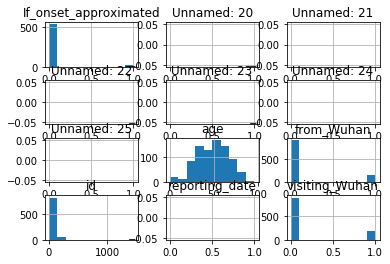

In [102]:
df.hist()

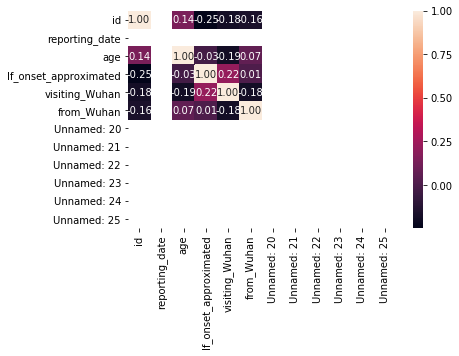

In [101]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [147]:
num_vars = df[['symptom', 'case_in_country', 'summary', 'source', 'link']]

num_vars.head()

,symptom,case_in_country,summary,source,link
1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [148]:
all_rm = num_vars.dropna(axis=0) # dataframe with rows for nan removed

all_rm.head()

,symptom,case_in_country,summary,source,link
195,"feaver, cough, difficult in breathing",1/27/2020,new recovered COVID-19 pneumonia patient in Hu...,人民日报,https://m.weibo.cn/status/4465382079294013?
196,"feaver, cough, difficult in breathing",1/27/2020,new recovered COVID-19 pneumonia patient in Hu...,人民日报,https://m.weibo.cn/status/4465382079294013?
197,fever,1/27/2020,new recovered COVID-19 pneumonia patient in Sh...,人民日报,https://m.weibo.cn/status/4465385308652598?
237,fever,1/15/2020,"new confirmed COVID-19 patient in Japan: male,...",HK World-Japan,https://www3.nhk.or.jp/nhkworld/en/news/202001...
241,fever,1/28/2020,"new confirmed COVID-19 patient in Japan: male,...",Kyodo News,https://english.kyodonews.net/news/2020/01/e8f...
